In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('reddit_posts_with_sentiment.csv')

In [3]:
df.head()

,post_id,title,content,subreddit,author,created_utc,sentiment,sentiment_label
0,1h6gd05,SpaceX shares available for investment through...,You can now invest in SpaceX with a SoFi accou...,stocks,Progress_8,1970-01-01 00:00:01.733319984,0.4404,Positive
1,1h6ftzy,GM expects more than $5 billion impact from Ch...,General Motors expects a restructuring of its ...,stocks,Puginator,1970-01-01 00:00:01.733318480,-0.7184,Negative
2,1h6ffnf,Whats going on with the french index?,Lets talk about the french CAC 40 index\n \nIn...,stocks,Slight_Candy,1970-01-01 00:00:01.733317295,-0.8277,Negative
3,1h6d0rv,"r/Stocks Daily Discussion Wednesday - Dec 04, ...",These daily discussions run from Monday to Fri...,stocks,AutoModerator,1970-01-01 00:00:01.733308208,0.7650,Positive
4,1h691u7,I Want to Hear Your Thoughts on the Qualities ...,With Pat Gelsinger retiring the company is onc...,stocks,Intelligent-Snow-930,1970-01-01 00:00:01.733291089,0.5859,Positive


In [4]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [5]:
X = tfidf.fit_transform(df['content'])

In [6]:
le = LabelEncoder()

In [7]:
y = le.fit_transform(df['sentiment_label'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf.predict(X_test)

In [12]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [14]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [15]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [22]:
# Check if X_test is a sparse matrix and convert to dense if necessary
if hasattr(X_test, 'toarray'):
    X_test_dense = X_test.toarray()  # Convert sparse matrix to a dense array
else:
    X_test_dense = X_test  # It's already dense

In [26]:
# Make predictions
predictions = rf.predict(X_test_dense)

# Flatten predictions if they are 2D
if predictions.ndim > 1:
    predictions = predictions.ravel()

In [27]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

C:\Users\prana\AppData\Local\Temp\ipykernel_8616\2744595922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_pred, palette='viridis')


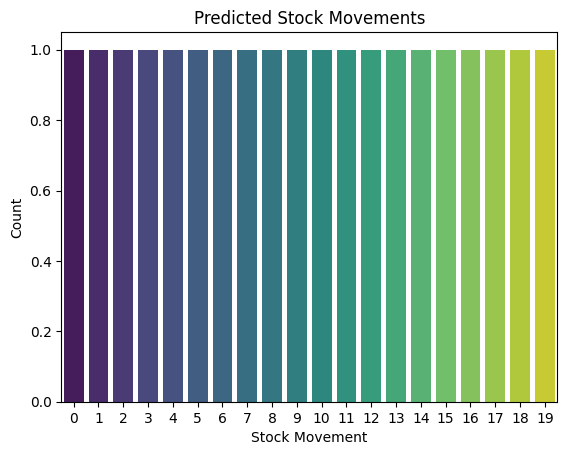

In [35]:
# Plot the count of predicted movements
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=y_pred, palette='viridis')
plt.title('Predicted Stock Movements')
plt.xlabel('Stock Movement')
plt.ylabel('Count')
plt.show()
